Первая информация о данных:
  Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   
3   Girl  11-15          School   Non Government         No      Yes   
4   Girl  16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobile Data           4G            1-3   
2           Low                 Mid          Wifi           4G            1-3   
3           Low                 Mid   Mobile Data           4G            1-3   
4           Low                Poor   Mobile Data           3G              0   

  Self Lms  Device Adaptivity Level  
0       No    

<ipython-input-2-beca20fb0b93>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Adaptivity Level', palette='viridis')


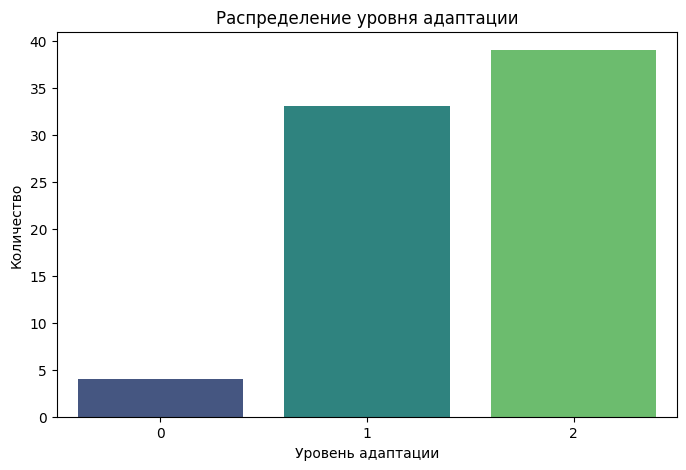

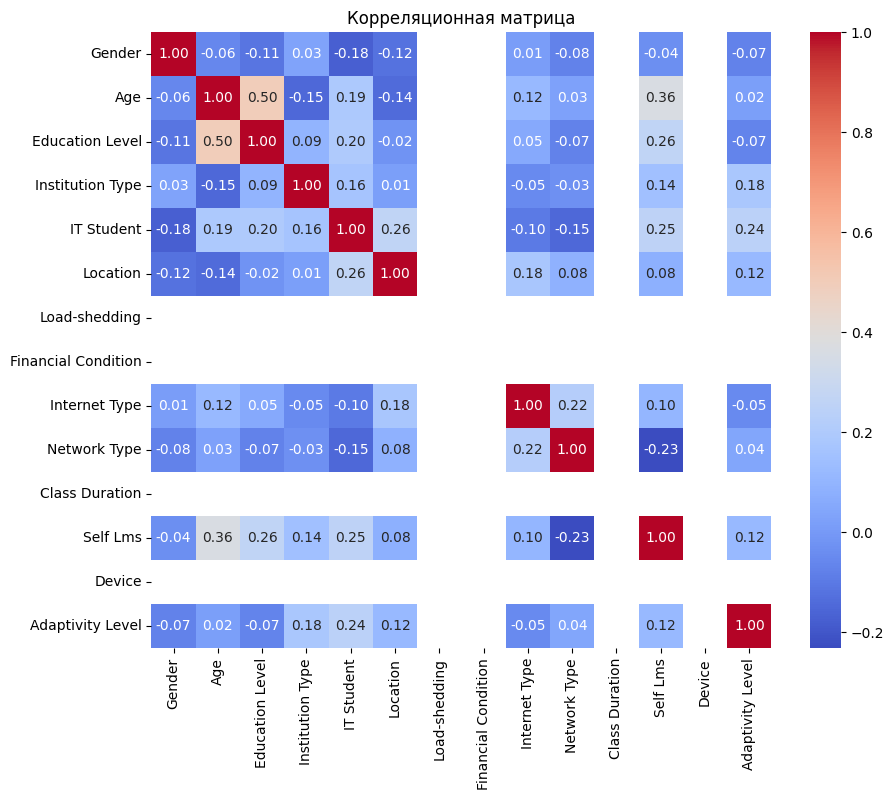

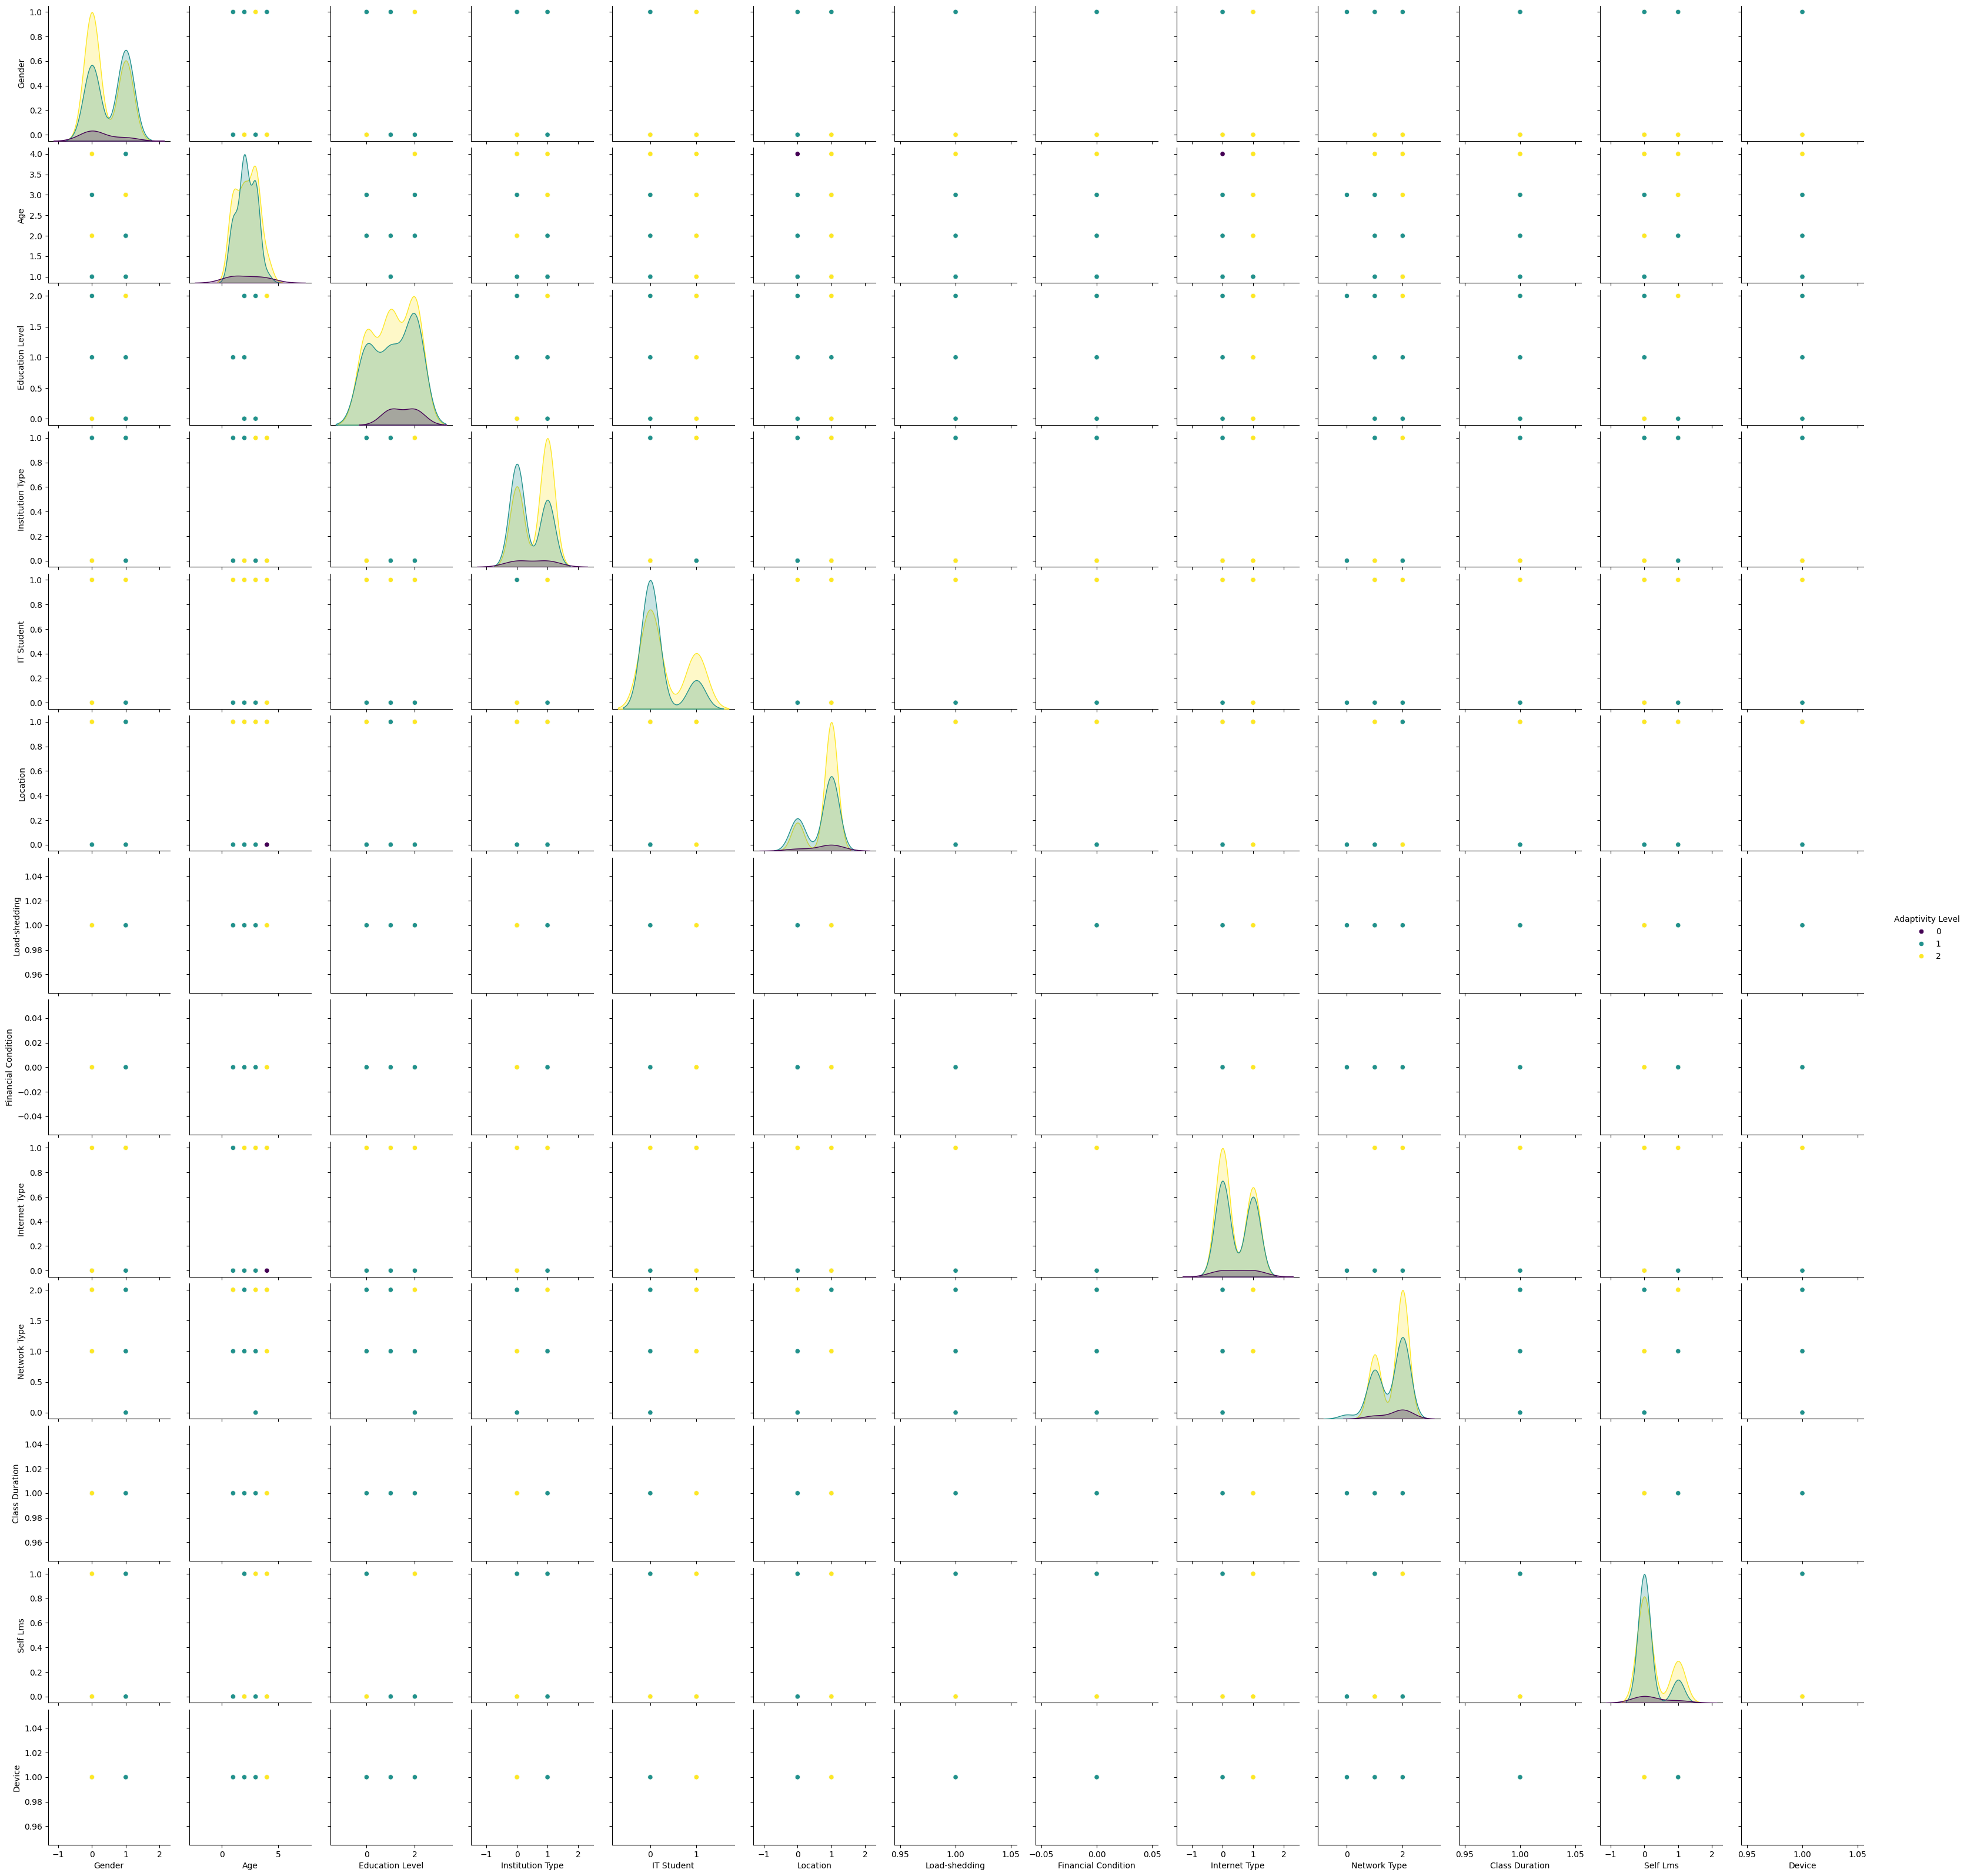


SVM Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.25      0.31         8
           2       0.45      0.62      0.53         8

    accuracy                           0.44        16
   macro avg       0.43      0.44      0.42        16
weighted avg       0.43      0.44      0.42        16

SVM Accuracy: 0.44

KNN Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.50      0.47         8
           2       0.43      0.38      0.40         8

    accuracy                           0.44        16
   macro avg       0.44      0.44      0.44        16
weighted avg       0.44      0.44      0.44        16

KNN Accuracy: 0.44

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         8
           2       0.50      0.38      0.43         8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_


Средняя абсолютная ошибка (MAE): 0.51
Среднеквадратическая ошибка (MSE): 0.34


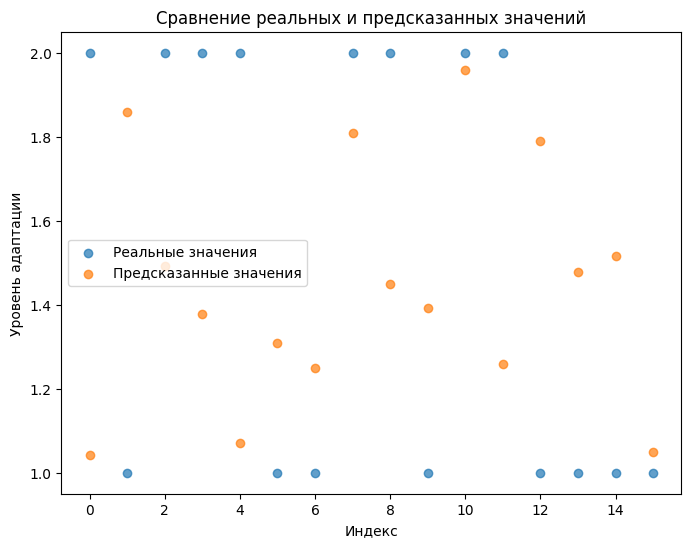


Заключение:
1. Выполнена очистка данных: обработаны пропущенные значения, удалены дубликаты, устранены выбросы.
2. Проведен исследовательский анализ данных: выявлены основные тренды, корреляции и распределения.
3. Протестированы модели классификации (SVM, KNN, Naive Bayes) и оценены их метрики.
4. Построена регрессионная модель с метриками MAE и MSE.


In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 1. Введение: Загрузка данных
file_path = 'students_adaptability_level_online_education.csv'
data = pd.read_csv(file_path)
print("Первая информация о данных:")
print(data.head())
print(data.info())

# 2. Очистка данных
# Проверка пропущенных значений
print(f"\nКоличество пропущенных значений:\n{data.isnull().sum()}")

# Замена пропущенных значений
data.fillna(data.mode().iloc[0], inplace=True)

# Преобразование типов данных, если требуется
for col in data.select_dtypes('object').columns:
    if len(data[col].unique()) < 10:  # Предполагаем, что это категориальные данные
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Удаление дубликатов
duplicates = data.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")
data = data.drop_duplicates()

# Выявление и обработка выбросов
numeric_columns = data.select_dtypes(include=np.number).columns
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print(f"\nИнформация о данных после очистки:\n{data.info()}")

# 3. Исследовательский анализ данных (EDA)
# Основная статистика
print("\nОсновная статистика числовых данных:")
print(data.describe())

# Графики распределения
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Adaptivity Level', palette='viridis')
plt.title("Распределение уровня адаптации")
plt.xlabel("Уровень адаптации")
plt.ylabel("Количество")
plt.show()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

# Парные графики
sns.pairplot(data, hue='Adaptivity Level', palette='viridis')
plt.show()

# 4. Преобразование данных и проектирование признаков
# Создание новых признаков (пример: нормализация возраста)
if 'Age' in data.columns:
    data['Age_Normalized'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()

# Масштабирование данных
scaler = StandardScaler()
X = data.drop(columns=['Adaptivity Level'])
y = data['Adaptivity Level']
X_scaled = scaler.fit_transform(X)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Модели классификации
# SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_predictions))
print(f"KNN Accuracy: {knn_accuracy:.2f}")

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
nb_predictions = naive_bayes.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

# 6. Регрессия (MAE и MSE)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\nСредняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратическая ошибка (MSE): {mse:.2f}")

# Визуализация предсказанных и реальных значений
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label="Реальные значения", alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Предсказанные значения", alpha=0.7)
plt.title("Сравнение реальных и предсказанных значений")
plt.xlabel("Индекс")
plt.ylabel("Уровень адаптации")
plt.legend()
plt.show()

# 7. Заключение
print("\nЗаключение:")
print("1. Выполнена очистка данных: обработаны пропущенные значения, удалены дубликаты, устранены выбросы.")
print("2. Проведен исследовательский анализ данных: выявлены основные тренды, корреляции и распределения.")
print("3. Протестированы модели классификации (SVM, KNN, Naive Bayes) и оценены их метрики.")
print("4. Построена регрессионная модель с метриками MAE и MSE.")
